Optimization

In [151]:
from scipy import optimize
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy
import pandas as pd
sympy.init_printing()
%config InlineBackend.figure_format='svg' #'png2x','svg','jpeg','pdf','png','jpg','retina'

$$
\text{自定义命令}  
\newcommand{\inner}[2]{{\langle #1,#2\rangle}}
\newcommand{\dlim}{\displaystyle \lim}  
\newcommand{\dint}{\displaystyle \int}   
\newcommand{\ra}{\rangle}  
\newcommand{\la}{\langle}   
\newcommand{\inner}[2]{{\langle #1,#2\rangle}}
\newcommand{\x}{\mathbf{x}}   
\newcommand{\xt}{\mathbf{x}^{\mathsf{T}}}   
\newcommand{\T}{{\mathsf{T}}}
\newcommand{\abf}{\mathbf{a}}   
\newcommand{\abft}{\mathbf{a}^{\mathsf{T}}}   
\newcommand{\R}{\mathbb{R}}   
\newcommand{\C}{\mathbb{C}}   
\newcommand{\E}{\mathrm{e}}   
\newcommand{\F}{\mathbb{F}}   
\newcommand{\X}{\mathbf{X}}   
\newcommand{\Y}{\mathbf{Y}}  
\newcommand{\f}{\mathbf{f}}  
\newcommand{\U}{\mathbf{u}}   
\newcommand{\D}{\mathrm{d}}  
\newcommand{\M}{\mathcal{M}}  
\newcommand{\LL}{\mathcal{L}}  
\newcommand{\nullspace}{\mathrm{null}}   
\newcommand{\range}{\mathrm{range}}   
\newcommand{\Sum}[2]{{\sum_{#1}^{#2}}}   
\newcommand{\Union}[2]{{\bigcup_{#1}^{#2}}}   
\newcommand{\Intersection}[2]{{\bigcap_{#1}^{#2}}}   
\newcommand{\pd}[1]{\frac{\partial}{\partial #1}} \notag
$$  

In [ ]:
optimize.minimize(fun)

# Univariate Optimization

optimize.minimize_scalar

\begin{example}
$f(r,h)$ = $2\pi r^2 + 2\pi rh$ and the constraint is g(r,h)=$\pi r^2 h-1$=0   
事实上，可行区域为
$$
{(r,\frac{1}{\pi r^2})}
$$
从而该问题转化为了最小化
$$
f(r) = 2\pi r^2 + \frac{2}{r}
$$
只需一阶偏导为0和Hessian矩阵正定即可
\end{example}

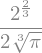

In [2]:
r,h = sympy.symbols("r,h")
Area = 2*sympy.pi*r**2 + 2*sympy.pi*r*h
Volume = sympy.pi*r**2*h -1
h_r = sympy.solve(Volume)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]
rsol

In [3]:
rsol.evalf()

In [4]:
Area_r.diff(r,2).subs(r,rsol) # 正定，因此为极小值点

\begin{example}

\end{example}

In [5]:
def f(r):
    return 2*np.pi*r**2 + 2/r

In [6]:
r_min = optimize.brent(f,brack=(0.1,4))
f(r_min)

In [7]:
optimize.minimize_scalar(f,bracket=(0.1,4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

# Uncontrained Multivariate Optimization
123|123
----|----
optimize.fmin_bfgs
optimize.fmin_ncg
optimize.fmin_cg

In [77]:
?optimize.fmin_ncg

## Steepest Descent method

我们首先对梯度方向上升最快，梯度负方向下降最快给一个严格的数学描述   
Suppose $f:\R^n \to \R$, and $\triangledown f$ is the gradient. Then we have
\begin{eqnarray*}
f(x_0 + \Delta x) &\sim& \sum_{i=1}^n \frac{\partial f}{x_i}(x_0) \Delta x_i \\
&=& \inner{\triangledown f(x_0)}{\Delta x} \\
&=& \Vert \triangledown f(x_0) \Vert \Vert \Delta x \Vert \cos \theta 
\end{eqnarray*} 

因此呢，我们可以使用如下的迭代方式
$$
x_{k+1} = x_k - a_k \triangledown f(x_k)
$$
其中a_k 称作线性搜寻参数

\begin{theorem}[Newton's Method] \ \\
$$
x_{k+1} = x_k - H_{f}^{-1}(x_k) \triangledown f(x_k)
$$
H_{f}^{-1} is the inverse of hessian matrix of f at x_k
\end{theorem}


\begin{example}
$$
f(x) = (x_1-1)^4 + 5(x_2-1)^2-2x_1x_2
$$
\end{example}


In [16]:
# 实操梯度下降
x1, x2 = sympy.symbols("x_1,x_2")
f_sym = (x1-1)**4 + 5*(x2-1)**2-2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1,x2)]
fhess_sym = [[f_sym.diff(x_1,x_2) for x_1 in (x1,x2)] for x_2 in (x1,x2)]

In [21]:
f_sym

In [18]:
# gradient
sympy.Matrix([fprime_sym])

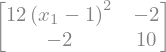

In [20]:
# Hessian
sympy.Matrix(fhess_sym)

In [51]:
# 由于scipy对函数的要求是，输入一个list，得到与之前类似的效果
f_lambda = sympy.lambdify((x1,x2),f_sym,'numpy')
fprime_lambda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lambda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')
def func_XY_to_X_Y(f):
#Wrapper for f(X) -> f(X[0], X[1])
    return lambda X: np.array(f(X[0], X[1]))
f = func_XY_to_X_Y(f_lambda)
fprime = func_XY_to_X_Y(fprime_lambda)
fhess = func_XY_to_X_Y(fhess_lmbda)
fvec = np.vectorize(f_lambda)

In [53]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess) 

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


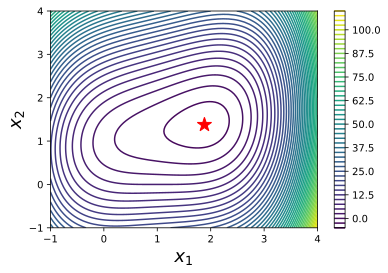

In [67]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lambda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [71]:
optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


array([1.88292612, 1.37658523])

In [72]:
optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [73]:
optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


array([1.88292644, 1.37658595])

In [78]:
result = optimize.minimize(f,(0,0),method='BFGS')

# Nonlinear Least Square Problems

One example is the Levenberg-Marquardt method, which is based on the idea of successive linearizations of the problem in each iteration

Considering that 
$$
f(x,\beta) = \beta_0 + \beta_1 \exp{-\beta_2 x^2} \notag
$$
and we also suppose that 
$$
y_i = f(x_i,0.25,0.75,0.5) + u_i
$$

In [86]:
beta = (0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0 + b1*np.exp(-b2*x**2)
f = np.vectorize(f)

In [89]:
xdata = np.linspace(0, 5, 50)

In [91]:
y = f(xdata,*beta)
ydata = y + 0.05*np.random.rand(len(xdata))

In [100]:
def g(beta):
    return ydata-f(xdata,*beta)

In [102]:
beta_start = (1,1,1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)

In [103]:
beta_opt

array([0.26969476, 0.75995235, 0.50623912])

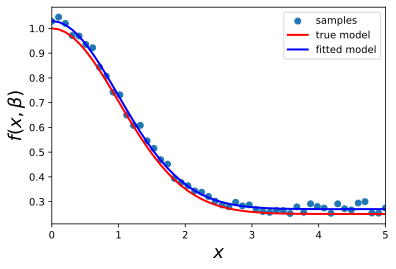

In [105]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')     
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

In [106]:
beta_opt, beta_cov = optimize.curve_fit(f,xdata,ydata)
beta_opt

ValueError: Unable to determine number of fit parameters.

# Constrained Optimization
This type of problems can be solved using the L-BFGS-B method in SciPy, which is a variant of the BFGS method we used earlier.  
 This solver is available through the function optimize.fmin_l_bgfs_b or via optimize.minimize with the method argument set to 'L-BFGS-B'. 

In [117]:
# 注意optimize对f的要求是输入一个list.
def f(X):
    x = X[0]
    y = X[1]
    return (x-1)**2 + (y-1)**2

In [120]:
# 无约束最优化
optimize.minimize(f,[1,1],method='BFGS')

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([1.49011612e-08, 1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1., 1.])

In [121]:
# 约束最优化
bnd_x1 = (2,3)
bnd_x2 = (0,2)
optimize.minimize(f,[1,1],method='L-BFGS-B',bounds=[(2,3),(0,2)])

      fun: 1.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([2., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2., 1.])

In [122]:
x = x0, x1, x2, l = sympy.symbols("x_0, x_1, x_2, lambda") 

In [126]:
# 更一般的约束条件
def f(X):
    return (X[0]-1)**2 + (X[1]-1)**2
def g(X):
    return X[1]-1.75-(X[0]-0.75)**4
def xx(X):
    return X[0]

In [130]:
constraints = [dict(type='ineq',fun=g),dict(type='eq',fun=xx)]

In [131]:
optimize.minimize(f,(0,0),method='SLSQP',constraints=constraints)

     fun: 2.1372222900390607
     jac: array([-2.       ,  2.1328125])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.        , 2.06640625])

Summary:  
constraints 需要输入一个list, list中的元素是字典。

# Examples

## MLE

In [141]:
import scipy.stats as st

In [137]:
data = pd.Series([0.02,0.04,0.07,0.12,0.06,0.05,0.08,0.14,0.1,0.02,0.03,0.02,0.06,0.07,0.09,0.06,0.11])

In [148]:
# 定义损失函数
def gfunc(x,r,PD):
    return np.sqrt((1-r)/r)*np.exp(0.5*(st.norm.ppf(x)**2-((np.sqrt(1-r)*st.norm.ppf(x)-st.norm.ppf(PD))/np.sqrt(r))**2))

def loss(beta,dt=data):
    return -dt.apply(lambda t:gfunc(t,beta[0],beta[1])).prod()
def logloss(beta,dt=data):
    return -dt.apply(lambda t:np.log(gfunc(t,beta[0],beta[1]))).sum()

In [149]:
optimize.minimize(loss,(0.1,0.1))

      fun: -346566865750425.5
 hess_inv: array([[1.94618997e-18, 2.05994617e-19],
       [2.05994617e-19, 2.59144555e-19]])
      jac: array([ 1.30023424e+08, -2.09715200e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 146
      nit: 7
     njev: 45
   status: 2
  success: False
        x: array([0.08262462, 0.06725271])

In [150]:
optimize.minimize(logloss,(0.1,0.1))

      fun: -33.47909689068999
 hess_inv: array([[6.74915037e-04, 7.13106217e-05],
       [7.13106217e-05, 9.53656389e-05]])
      jac: array([ 2.38418579e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 16
   status: 0
  success: True
        x: array([0.08262463, 0.06725271])

## Linear Regression

# Summary

- f: 目标函数f的输入必须为一个list，这一点在定义函数的时候需要注意
- g: 对于约束函数g，我们需要将其转化为=0或者>=0的形式
- constraints: 为一个list，list中的元素为dict，例如[dict(type='eq',fun=g)]
- bound:同理，只不过list中的元素是turple

用到的函数  
optimize.minimize(f,start,method='',)
- f: 目标函数
- start: 一个turple
- method: 'SLSQP', 'L-BFGS-B'